In [9]:
pip install moviepy scipy pydub

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from moviepy.editor import VideoFileClip

def extract_audio(video_path, output_audio_path):
    video = VideoFileClip(video_path)
    video.audio.write_audiofile(output_audio_path)
    video.close()

# 사용 예시
extract_audio("/content/2_1_표본추출법.mp4", "output_audio.wav")

MoviePy - Writing audio in output_audio.wav


MoviePy - Done.


In [4]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import welch

def compute_equalizer(audio_path):
    sample_rate, data = wavfile.read(audio_path)

    # 모노로 변환 (스테레오일 경우)
    if data.ndim > 1:
        data = np.mean(data, axis=1)

    # Welch 메서드를 사용해 주파수 분석
    frequencies, power = welch(data, fs=sample_rate, nperseg=1024)

    # 대역별 파워 추출 (이퀄라이저 대역 설정)
    bands = [20, 60, 250, 500, 2000, 4000, 6000, 8000, 16000]  # Hz
    equalizer_values = []
    for i in range(len(bands) - 1):
        mask = (frequencies >= bands[i]) & (frequencies < bands[i + 1])
        band_power = np.mean(power[mask])
        equalizer_values.append(band_power)

    return equalizer_values

# 사용 예시
eq_values = compute_equalizer("output_audio.wav")
print(eq_values)

[410.49599607284733, 22191.119200891386, 20762.776409324455, 3262.0516207655887, 304.4992600405891, 49.96628420210828, 18.44927753681036, 3.444820282436578]


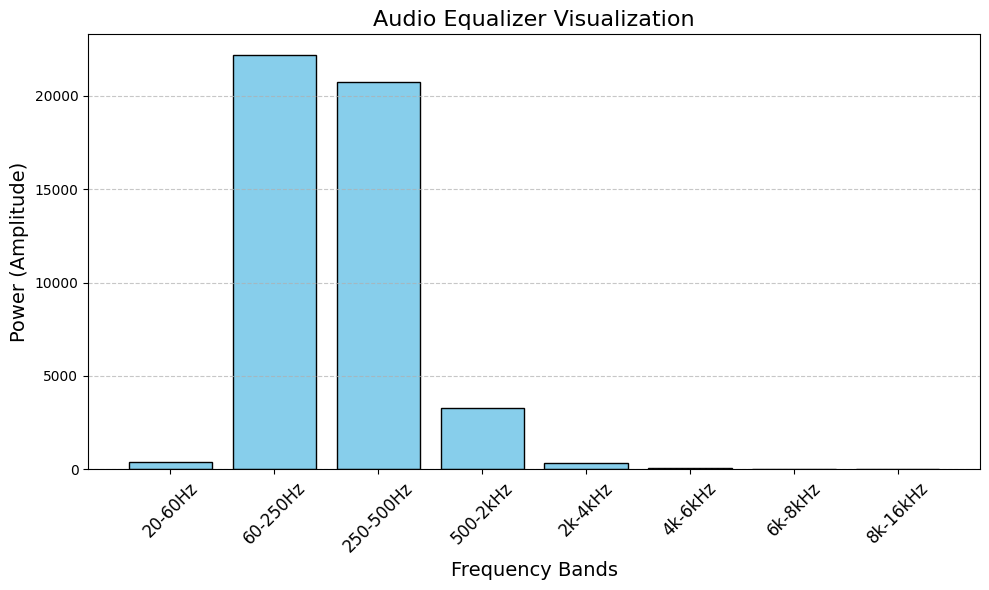

In [5]:
import matplotlib.pyplot as plt

def visualize_equalizer(equalizer_values):
    # 이퀄라이저 대역 (주파수 범위)
    bands = ["20-60Hz", "60-250Hz", "250-500Hz", "500-2kHz",
             "2k-4kHz", "4k-6kHz", "6k-8kHz", "8k-16kHz"]

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.bar(bands, equalizer_values, color='skyblue', edgecolor='black')
    plt.xlabel("Frequency Bands", fontsize=14)
    plt.ylabel("Power (Amplitude)", fontsize=14)
    plt.title("Audio Equalizer Visualization", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 사용 예시
visualize_equalizer(eq_values)

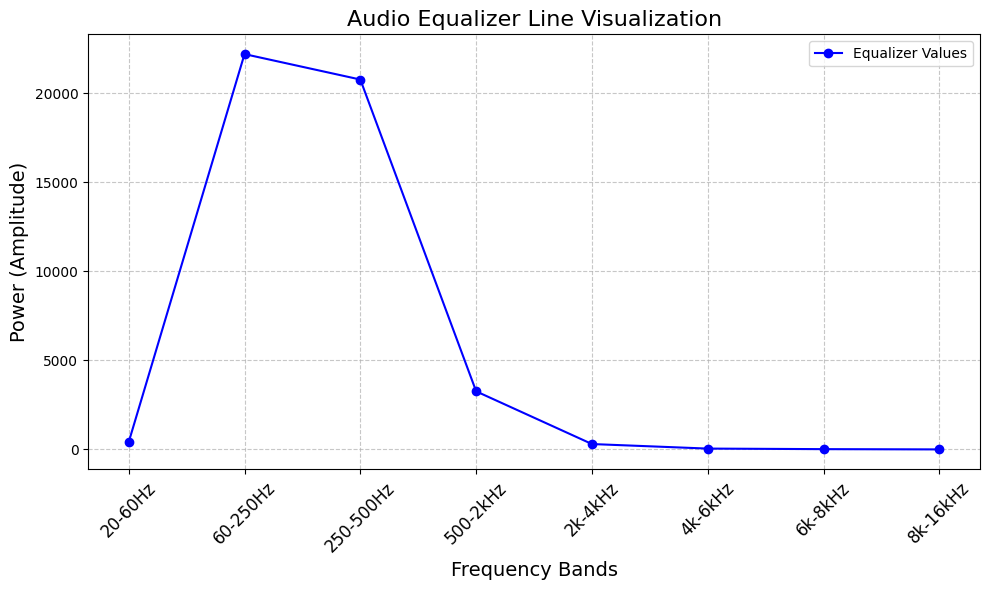

In [6]:
def visualize_equalizer_line(equalizer_values):
    # 이퀄라이저 대역 (주파수 범위)
    bands = ["20-60Hz", "60-250Hz", "250-500Hz", "500-2kHz",
             "2k-4kHz", "4k-6kHz", "6k-8kHz", "8k-16kHz"]

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(bands, equalizer_values, marker='o', color='blue', label="Equalizer Values")
    plt.xlabel("Frequency Bands", fontsize=14)
    plt.ylabel("Power (Amplitude)", fontsize=14)
    plt.title("Audio Equalizer Line Visualization", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 사용 예시
visualize_equalizer_line(eq_values)

In [ ]:
# import pandas as pd

# def save_to_csv(equalizer_values, output_csv):
#     bands = ["20-60Hz", "60-250Hz", "250-500Hz", "500-2kHz", "2k-4kHz", "4k-6kHz", "6k-8kHz", "8k-16kHz"]
#     df = pd.DataFrame([equalizer_values], columns=bands)
#     df.to_csv(output_csv, index=False)

# # 사용 예시
# save_to_csv(eq_values, "equalizer_values.csv")